# Analysis of French ACC/UAC control sectors

#### Analysis of Air Traffic Control en-route sectors of Metropolitan France

##### *Refer to tables_building.ipynb to generate sectors and volumes files (sectors.csv and volumes.geojson)*

#### <br> Load tables

In [1]:
import pandas as pd
df = pd.read_csv('sectors.csv')
df.sample(4)

,acc,control_sector,volumes,elementary_sectors
72,LFRR,GAIU,"['GI', 'GU', 'AI', 'AU']","['GU', 'AI', 'GI', 'AU']"
270,LFFF,TENB,"['TB 1', 'TB 2', 'TE 1', 'TE 2', 'TN 1', 'TN 2']","['TN', 'TB', 'TE']"
136,LFRR,ZSI,"['ZI', 'ZS']","['ZI', 'ZS']"
163,LFMM,DZH,"['DH', 'ZH']","['DH', 'ZH']"


In [2]:
import geopandas as gpd
import numpy as np
gdf = gpd.read_file('volumes.geojson')
gdf.sample(4)

,volume,elementary_sector,acc,level_min,level_max,geometry
10,LM,LM,LFBB,0,195,"POLYGON ((-0.25 47.167, 0.261 47.167, 1.467 47..."
34,X4,X4,LFBB,365,999,"POLYGON ((0.657 45.032, 1.098 45.193, 2.281 44..."
200,HR,HR,LFEE,375,999,"POLYGON ((3.61 50.495, 3.588184441755715 50.37..."
5,L1,L1,LFBB,195,295,"POLYGON ((1.467 47.167, 1.814 46.882, 2.353 46..."


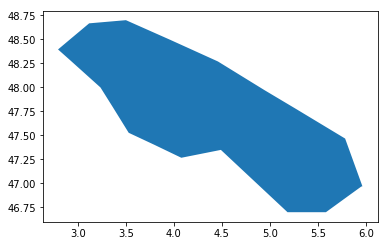

In [4]:
gdf.query('volume=="KD 3"').plot()

#### <br> Number of Area Control Centers (ACC), sectors and airspace volumes

In [46]:
print('Number of ACCs over Metropolitan France: {}'.format(gdf['acc'].nunique()))
print('Number of control sectors over Metropolitan France: {}'.format(df['control_sector'].nunique()))
print('Number of elementary sectors over Metropolitan France: {}'.format(gdf['elementary_sector'].nunique()))
print('Number of airspace volumes over Metropolitan France: {}'.format(gdf['volume'].count()))

Number of ACCs over Metropolitan France: 5
Number of control sectors over Metropolitan France: 333
Number of elementary sectors over Metropolitan France: 168
Number of airspace volumes over Metropolitan France: 224


#### <br> Number of volumes and sectors per ACC

In [71]:
s_cs = df['acc'].value_counts()
s_vol = gdf['acc'].value_counts()
s_es = gdf.groupby('acc')['elementary_sector'].nunique()
df_s = pd.concat([s_vol.rename('nb_volumes'), s_es.rename('nb_elementary_sectors'), s_cs.rename('nb_control_sectors')], axis=1)
df_s['total_sectors'] = df_s['nb_elementary_sectors'] + df_s['nb_control_sectors']
df_s.sort_values(['total_sectors'])

,nb_volumes,nb_elementary_sectors,nb_control_sectors,total_sectors
LFFF,54,29,38,67
LFEE,30,23,52,75
LFBB,39,38,58,96
LFRR,42,31,84,115
LFMM,59,47,101,148


#### <br> Smallest and largest airspace volumes (horizontal surface) and elementary sectors

##### Largest and smallest volumes

In [68]:
gdf["surface"] = gdf['geometry'].area
gdf.sort_values(['surface'], ascending=False, inplace=True)
gdf.head(4)

,volume,elementary_sector,acc,level_min,level_max,geometry,surface
43,AU,AU,LFRR,365,999,"POLYGON ((-8.75 47.25, -8 47.25, -5.5 47.25, -...",12.835058
42,AS 3,AS,LFRR,195,345,"POLYGON ((-8.75 47.25, -8 47.25, -5.5 47.25, -...",12.835058
39,AI,AI,LFRR,345,365,"POLYGON ((-8.75 47.25, -8 47.25, -5.5 47.25, -...",12.835058
41,AS 2,AS,LFRR,55,195,"POLYGON ((-8.75 47.25, -8 47.25, -5.5 47.25, -...",12.835058


In [69]:
gdf.tail(4)

,volume,elementary_sector,acc,level_min,level_max,geometry,surface
183,UK 1,UK,LFFF,195,245,"POLYGON ((-0.25 50, 0.444 50.274, 0.833 49.937...",0.426362
178,TP 3,TP,LFFF,245,265,"POLYGON ((0.444 50.274, 0.821 50.421, 1.388 49...",0.325937
151,DO 3,DO,LFFF,0,125,"POLYGON ((1.875 48.502, 2.92 48.502, 2.793 48....",0.212400
194,E 1,E,LFEE,125,145,"POLYGON ((6.212 49.507, 6.186320428094206 49.4...",0.026361


##### Largest and smallest elementary sectors

In [56]:
gdf.groupby('elementary_sector').max().nlargest(4, 'surface')

,volume,acc,level_min,level_max,surface
elementary_sector,,,,,
AI,AI,LFRR,345,365,12.835058
AS,AS 3,LFRR,195,345,12.835058
AU,AU,LFRR,365,999,12.835058
ID,ID 2,LFRR,195,255,9.885116


In [57]:
gdf.groupby('elementary_sector').max().nsmallest(4, 'surface')

,volume,acc,level_min,level_max,surface
elementary_sector,,,,,
DS,DS,LFFF,0,175,0.770265
QI,QI,LFRR,345,365,0.804880
QS,QS,LFRR,295,345,0.804880
QU,QU,LFRR,365,999,0.804880


##### Display largest and smallest elementary sectors

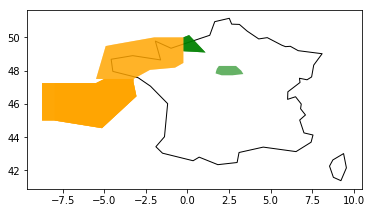

In [67]:
from shapely.geometry import Polygon
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
france = world[world.name == "France"].copy()
france.geometry = france.geometry.intersection(Polygon([(-10,41),(-10,52),(10,52),(10,41)]))
ax = france.plot(color='white', edgecolor='black', linewidth=1.0)
smalls = list(gdf.groupby('elementary_sector').max().nsmallest(4, 'surface').index)
bigs = list(gdf.groupby('elementary_sector').max().nlargest(4, 'surface').index)
gdf.query('elementary_sector == @smalls').plot(ax=ax, color='green', alpha=0.6)
gdf.query('elementary_sector == @bigs').plot(ax=ax, color='orange', alpha=0.6)

#### <br> Flight Levels

##### All flight levels used as level max in Metropolitan France

In [72]:
gdf.level_max.unique()

array([999, 345, 365, 195,  55, 255, 355, 245, 145, 385, 295, 285, 375,
       305, 225, 315, 335, 265, 175, 250, 125])

##### Flight levels used per ACC

In [87]:
for key, group in gdf.groupby('acc'):
    print(key, ': ', sorted(group['level_max'].unique()))

LFBB :  [195, 265, 295, 345, 365, 385, 999]
LFEE :  [145, 195, 225, 265, 285, 315, 345, 355, 365, 375, 385, 999]
LFFF :  [125, 175, 195, 245, 250, 265, 285, 295, 305, 315, 345, 355, 385, 999]
LFMM :  [175, 195, 245, 305, 335, 355, 375, 999]
LFRR :  [55, 145, 195, 245, 255, 305, 345, 355, 365, 999]


#### <br> Identify complex elementary sectors composed of most different volumes

In [88]:
gdf['elementary_sector'].value_counts().nlargest(3)

WS    5
AR    4
UK    4
Name: elementary_sector, dtype: int64

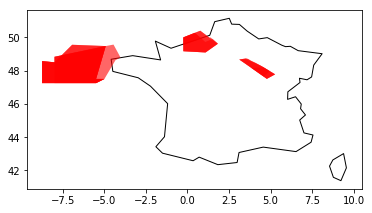

In [89]:
ax = france.plot(color='white', edgecolor='black', linewidth=1.0)
complex = list(gdf['elementary_sector'].value_counts().nlargest(3).index)
gdf.query('elementary_sector == @complex').plot(ax=ax, color='red', alpha=0.6)

#### <br> Display airspace volumes, ACCs and sectors

In [90]:
gdf_low = gdf.query('level_min <= 200 <= level_max')
gdf_high = gdf.query('level_min <= 350 <= level_max')
print('{} volumes at FL200, {} volumes at FL350'.format(gdf_low['volume'].count(),
                                                        gdf_high['volume'].count()))

48 volumes at FL200, 40 volumes at FL350


##### Display all volumes at FL200

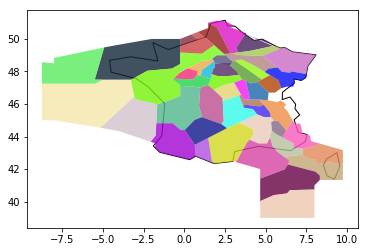

In [6]:
from shapely.geometry import Polygon
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
france = world[world.name == "France"].copy()
france.geometry = france.geometry.intersection(Polygon([(-10,41),(-10,52),(10,52),(10,41)]))
ax = france.plot(color='white', edgecolor='black', linewidth=1.0)
custom_colors = [np.random.random(3) for i in range(gdf_low['volume'].count())]
gdf_low.plot(ax=ax, color=custom_colors, alpha=0.8)

##### Display all volumes at FL350

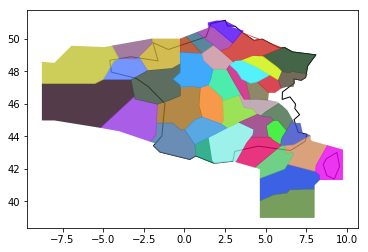

In [16]:
%matplotlib inline
from matplotlib import pyplot as plt
ax = france.plot(color='white', edgecolor='black', linewidth=1.0)
custom_colors = [np.random.random(3) for i in range(gdf_high['volume'].count())]
gdf_high.plot(ax=ax, color=custom_colors, alpha=0.8)
plt.savefig('fl350_volumes.svg', format="svg")

##### Display the ACCs at level FL350

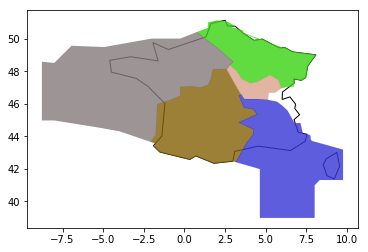

In [9]:
pd.set_option('mode.chained_assignment', None)
gdf_high['geometry'] = gdf_high.buffer(0.01)
ax = france.plot(color='white', edgecolor='black', linewidth=1.0)
custom_colors = [np.random.random(3) for i in range(5)]
gdf_high.dissolve(by='acc').plot(ax=ax, color=custom_colors, alpha=0.8)

##### Display elementary sectors' volumes of LFBB ACC at level FL190 (FIR Bordeaux)

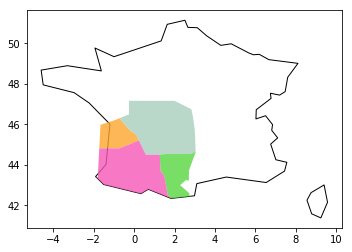

In [10]:
gdf_vlow = gdf.query('level_min <= 190 <= level_max')
ax = france.plot(color='white', edgecolor='black', linewidth=1.0)
custom_colors = [np.random.random(3) for i in range(gdf_vlow['volume'].count())]
gdf_vlow.query('acc == "LFBB"').dissolve(by='elementary_sector').plot(ax=ax, color=custom_colors, alpha=0.8)

#### <br> Sectors' centroids and cities

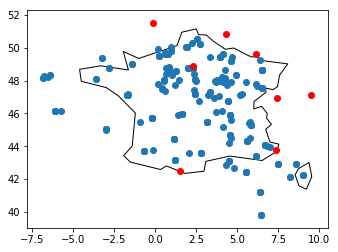

In [100]:
ax = france.plot(color='white', edgecolor='black', linewidth=1.0)
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
fr_cities = cities.cx[-10:10, 41:52]
gdf['geometry'].centroid.plot(ax=ax)
fr_cities.plot(ax=ax, color='red')

##### Test which volumes/sectors are above a given city (ex: Toulouse)

In [141]:
from shapely.geometry import Point
toulouse = Point(1.433, 43,60)
gdf['above_toulouse'] = gdf['geometry'].map(lambda x: True if x.contains(toulouse) else False)
gdf_a = gdf.query('above_toulouse == True')
gdf_a

,volume,elementary_sector,acc,level_min,level_max,geometry,surface,centroids,above_toulouse
30,TZ,TZ,LFBB,0,195,"POLYGON ((0.239 45.206, 0.58 44.5, 1.271 44.5,...",6.449720,POINT (-0.1279949205688178 43.76232898351121),True
12,N2,N2,LFBB,295,345,"POLYGON ((0.647 43.492, 1.472 43.919, 1.697 42...",1.029352,POINT (1.194875090027859 43.13795924870804),True
11,N1,N1,LFBB,195,295,"POLYGON ((0.647 43.492, 1.472 43.919, 1.697 42...",1.029352,POINT (1.194875090027859 43.13795924870804),True
14,N4,N4,LFBB,365,999,"POLYGON ((0.647 43.492, 1.472 43.919, 1.697 42...",1.029352,POINT (1.194875090027859 43.13795924870804),True
13,N3,N3,LFBB,345,365,"POLYGON ((0.647 43.492, 1.472 43.919, 1.697 42...",1.029352,POINT (1.194875090027859 43.13795924870804),True


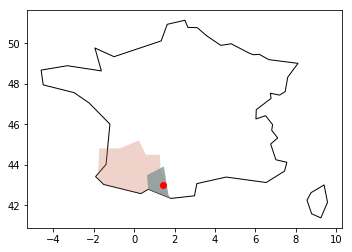

In [146]:
ax = france.plot(color='white', edgecolor='black', linewidth=1.0)
custom_colors = [np.random.random(3) for i in range(gdf_a['volume'].count())]
gdf_a.query('above_toulouse == True').plot(ax=ax, color=custom_colors, alpha=0.3)
df_t = pd.DataFrame({'geometry':[toulouse]})
gdf_t = gpd.GeoDataFrame(df_t, geometry='geometry')
gdf_t.plot(ax=ax, color='red')